In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

In [2]:
#loading data compiled from GAIA DR3

mags = pd.read_csv('gaia_mags.csv')
StellarTeff = mags['Teff'] #first pass temperatures

abs_g_mag = mags['abs_g_mag']
b_minus_r = mags['blue_minus_red']

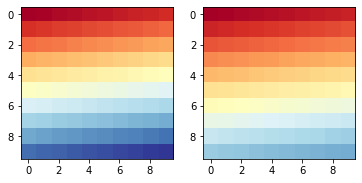

In [3]:
#color map with teff
import matplotlib.colors as colors


def truncate_colormap(cmapIn='RdYlBu', minval=0.0, maxval=1.0, n=100):

    cmapIn = plt.get_cmap(cmapIn)

 

    new_cmap = colors.LinearSegmentedColormap.from_list(

        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),

        cmapIn(np.linspace(minval, maxval, n)))
 

    arr = np.linspace(0, 50, 100).reshape((10, 10))

    fig, ax = plt.subplots(ncols=2)

    ax[0].imshow(arr, interpolation='nearest', cmap=cmapIn)

    ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)

    plt.show()
 
    return new_cmap

cmap_mod = truncate_colormap(minval=0, maxval=.8)  # calls function to truncate colormap

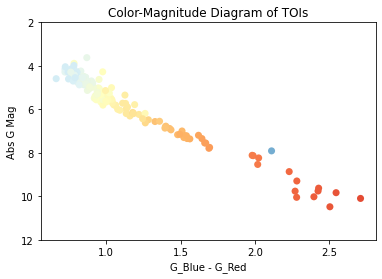

In [9]:
#HR Diagram

plt.scatter(b_minus_r, abs_g_mag, s=50,c=StellarTeff, cmap = cmap_mod,edgecolor='none',vmin=2500., vmax=7000)
plt.xlabel('G_Blue - G_Red')
plt.ylabel('Abs G Mag')
plt.title('Color-Magnitude Diagram of TOIs')
plt.ylim([12,2])

plt.show()